# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('dataset_clustering_result.csv')

In [3]:
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Cluster,Weight_Category
0,21,1.62,64.0,2,3,2,0.0,1.0,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,1,Normal
1,21,1.52,56.0,3,3,3,3.0,0.0,Male,yes,yes,Sometimes,yes,yes,Sometimes,Public_Transportation,1,Normal
2,23,1.80,77.0,2,3,2,2.0,1.0,Male,yes,yes,Sometimes,no,no,Frequently,Public_Transportation,2,Overweight
3,27,1.80,87.0,3,3,2,2.0,0.0,Male,yes,yes,Sometimes,no,no,Frequently,Walking,2,Overweight
4,22,1.78,89.8,2,1,2,0.0,0.0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,0,Overweight


In [4]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             490 non-null    int64  
 1   Height                          490 non-null    float64
 2   Weight                          490 non-null    float64
 3   FCVC                            490 non-null    int64  
 4   NCP                             490 non-null    int64  
 5   CH2O                            490 non-null    int64  
 6   FAF                             490 non-null    float64
 7   TUE                             490 non-null    float64
 8   Gender                          490 non-null    object 
 9   family_history_with_overweight  490 non-null    object 
 10  FAVC                            490 non-null    object 
 11  CAEC                            490 non-null    object 
 12  SMOKE           

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
X = df.drop(columns='Cluster')
y = df['Cluster']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data latih:", X_train.shape)
print("Jumlah data uji  :", X_test.shape)

Jumlah data latih: (392, 20)
Jumlah data uji  : (98, 20)


**Insight:**
- Ukuran dataset awal adalah total ada 490 data entri dan data ini terbagi menjadi data latih (80%) dengan 392 baris data dan data uji (20%) dengan 98 baris data.
- Jumlah fitur setelah dilakukan encoding dengan pd.get_dummies(drop_first=True) menjadi 23 kolom dan ini mencakup fitur numerik dan hasil one-hot encoding dari fitur kategorikal (seperti Gender, FAVC, MTRANS, dll).
- Penggunaan stratify=y memastikan bahwa proporsi kelas dalam target cluster terdistribusi secara proporsional di data latih dan data uji.
- random_state=42 menjamin bahwa hasil splitting akan reproducible yang artinya pembagian data akan dipastikan konsisten setiap kali kode dijalankan.


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.89      0.85      0.87        47
           2       0.74      0.76      0.75        34

    accuracy                           0.82        98
   macro avg       0.80      0.81      0.81        98
weighted avg       0.82      0.82      0.82        98

Confusion Matrix:
 [[14  1  2]
 [ 0 40  7]
 [ 4  4 26]]
Accuracy Score: 0.8163265306122449


**Insight:**
- Accuracy 81.63% yang mana ini menunjukkan bahwa model dapat mengklasifikasikan data dengan benar sekitar 82 dari 100 kasus. Untuk konteks klasifikasi tiga kelas ini merupakan performa yang cukup baik apalagi jika data tidak terlalu seimbang.
- Kelas 1 (Cluster 1) memiliki performa terbaik secara umum dengan Precision dan recall yang tinggi menunjukkan bahwa model sangat baik dalam mengenali dan membedakan kelas ini dari kelas lain. Dan ini wajar karena kelas ini juga memiliki jumlah data terbanyak (support = 47) sehingga model dapat belajar lebih baik.
- Kelas 0 (Cluster 0) meski support-nya kecil (17) namun model berhasil menangani kelas ini dengan precision 0.78 dan recall 0.82 yang berarti cukup baik dalam mendeteksi dan menghindari false positives.
- Kelas 2 (Cluster 2) memiliki nilai precision dan recall yang paling rendah yaitu sekitar 74%-76% dan hal ini mengindikasikan bahwa model masih sering bingung membedakan kelas ini dari yang lain, kemungkinan karena overlap karakteristik dengan kelas 1 dan 0.

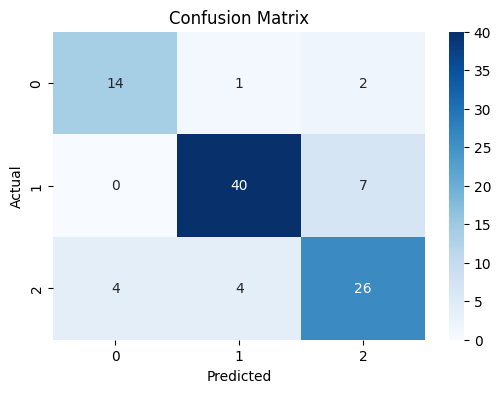

In [8]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Pada proyek ini, algoritma yang digunakan untuk melakukan klasifikasi adalah Decision Tree Classifier dan cara kerja algoritma ini adalah dengan membagi dataset ke dalam bentuk struktur pohon, di mana setiap simpul (node) mewakili suatu kondisi terhadap fitur tertentu dan setiap cabang mewakili hasil dari kondisi tersebut hingga mencapai leaf node yang berisi label kelas. Decision Tree sering digunakan sebagai model dasar (baseline) dalam pengembangan machine learning sebelum mencoba algoritma yang lebih kompleks seperti Random Forest atau Gradient Boosting dan hal ini membantu untuk memahami pola awal dalam data sebelum dilakukan tuning atau ensemble.

Dalam dataset ini terdapat campuran fitur numerik seperti Age, Height, Weight dan kategorikal seperti Gender, MTRANS, SMOKE dan dengan decision Tree mampu menangani kedua tipe data ini setelah data kategorikal dikodekan. Setelah fitur kategorikal dikodekan dengan teknik seperti one-hot encoding, Decision Tree mampu menggunakan informasi tersebut tanpa perlu normalisasi atau standardisasi berbeda dengan SVM atau KNN yang butuh skala seragam.




## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [9]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8163
F1 Score: 0.8173
Precision: 0.8190
Recall: 0.8163


**Insight:**
- Akurasi menunjukkan bahwa sekitar 81.63% dari seluruh prediksi yang dilakukan oleh model adalah benar. Ini mengindikasikan performa model yang cukup baik secara umum tetapi tidak memberikan informasi detail tentang keseimbangan kelas (apakah kelas mayoritas mendominasi prediksi atau tidak).
- Precision menunjukkan bahwa 81.90% dari semua prediksi positif yang dilakukan oleh model memang benar-benar positif.
- Recall mengukur seberapa banyak kasus positif yang berhasil ditangkap oleh model. Nilai 81.63% berarti dari seluruh individu yang seharusnya diklasifikasikan dalam suatu kelas tertentu dan model berhasil menangkap sebagian besar (81.63%) dari mereka.
- Nilai 81.73% pada F1-score menunjukkan bahwa model seimbang dalam ketepatan dan cakupan dan ini sangat baik dalam situasi dunia nyata di mana keduanya sama pentingnya.

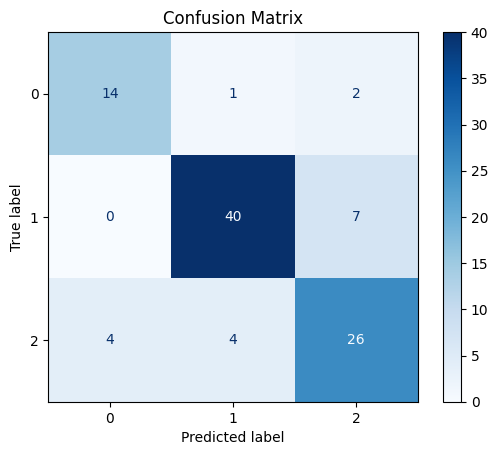

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [11]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

In [12]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted')
    }

results_df = pd.DataFrame(results).T
print("Evaluasi Model:\n", results_df)

Evaluasi Model:
                Accuracy  F1 Score  Precision    Recall
Decision Tree  0.816327  0.817273   0.818950  0.816327
Random Forest  0.897959  0.897103   0.898423  0.897959
KNN            0.795918  0.796345   0.799085  0.795918


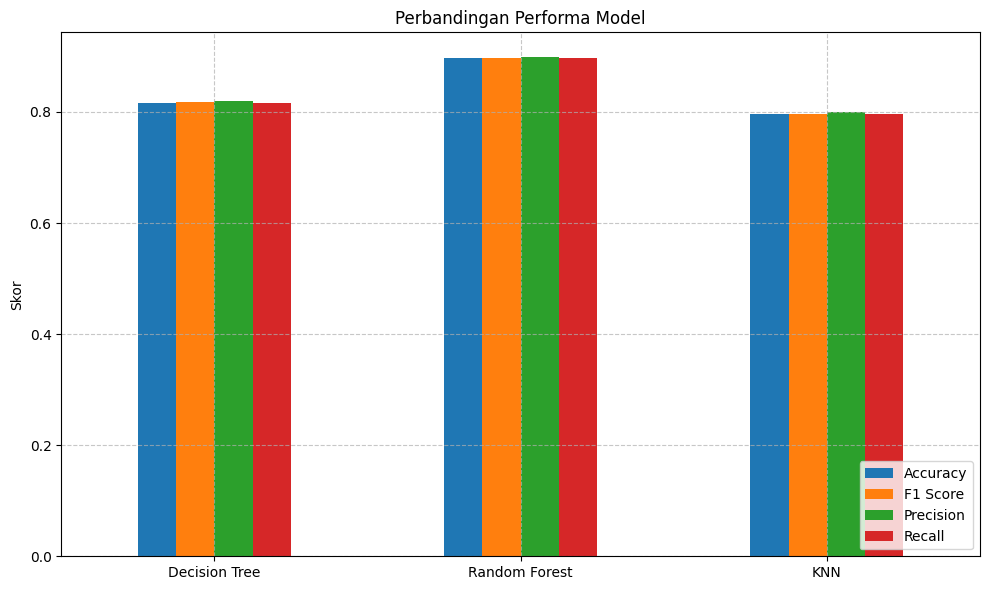

In [13]:
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Perbandingan Performa Model")
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Model Decision Tree menunjukkan performa yang cukup baik dengan akurasi sebesar 81.6% dan ini berarti sekitar 8 dari 10 prediksi yang dihasilkan model ini benar. Nilai F1 Score sebesar 0.817 menunjukkan bahwa model ini memiliki keseimbangan yang relatif baik antara kemampuan menangkap data positif yang benar (recall) dan kemampuan menghindari prediksi positif yang salah (precision). Dengan precision 0.819 maka model ini cukup baik dalam meminimalkan kesalahan prediksi positif palsu (false positive) dan dengan recall 0.816 model ini cukup tanggap dalam mendeteksi kelas yang benar. Namun karena Decision Tree bersifat sangat sensitif terhadap noise dan overfitting maka kinerjanya bisa menurun bila tidak dilakukan pruning atau pengaturan kedalaman yang tepat.
- Model Random Forest muncul sebagai model terbaik dalam eksperimen ini dengan skor tertinggi pada seluruh metrik evaluasi akurasi 89.8%, F1 Score 0.897, precision 0.898, dan recall 0.898. Kinerja yang konsisten di semua metrik ini menunjukkan keunggulan Random Forest dalam menyeimbangkan bias dan varians serta kemampuannya menggeneralisasi data dengan baik. Precision dan recall yang hampir identik menunjukkan bahwa model ini sangat bagus baik dalam mengenali kelas yang benar maupun menghindari kesalahan klasifikasi.
- Model K-Nearest Neighbors (KNN) memiliki performa paling rendah dibandingkan dua model lainnya dengan akurasi sebesar 79.6%, F1 Score 0.796, precision 0.799, dan recall 0.796 model ini tetap dapat diterima namun kurang optimal dalam konteks ini. Kinerja KNN sangat dipengaruhi oleh pemilihan parameter K dan skala data. Tanpa normalisasi atau pengaturan parameter yang tepat maka performa model bisa terhambat. Meskipun precision dan recall-nya cukup seimbang model ini cenderung tidak seefisien dalam mengenali pola kompleks terutama jika data memiliki banyak fitur atau distribusinya tidak merata.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [14]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, scoring='f1_weighted', random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a18669b9e90>},
                   random_state=42, scoring='f1_weighted')

In [15]:
print("Best Parameters (RandomizedSearchCV):")
print(random_search.best_params_)

Best Parameters (RandomizedSearchCV):
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 156}


**Insight:**
- Berdasarkan hasil max_depth=30 model ini diizinkan membentuk pohon keputusan dengan kedalaman hingga 30. Ini menunjukkan bahwa model memerlukan struktur pohon yang cukup dalam untuk menangkap kompleksitas hubungan antar fitur dalam data.
- Berdasarknan hasil min_samples_leaf=1 pada setiap daun pada pohon boleh berisi minimal 1 sampel dan ini bisa membuat pohon sangat fleksibel namun juga berisiko overfitting pada noise data. Tetapi dalam Random Forest ini tidak terlalu berbahaya karena hasil akhir adalah agregasi dari banyak pohon.
- Berdasarkan hasil min_samples_split=10 node hanya akan dipecah jika minimal ada 10 sampel dan ini memperketat proses pemisahan node dan membantu mengurangi overfitting dengan mencegah pemecahan yang terlalu spesifik.
- Berdasarkan hasil n_estimators=156 model menggunakan 156 pohon untuk membuat prediksi dan jumlah ini cukup untuk menghasilkan estimasi yang stabil tanpa membebani waktu komputasi secara berlebihan.

In [16]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nEvaluasi Model Terbaik:")
print(classification_report(y_test, y_pred))


Evaluasi Model Terbaik:
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.90      0.96      0.93        47
           2       0.88      0.85      0.87        34

    accuracy                           0.90        98
   macro avg       0.90      0.88      0.89        98
weighted avg       0.90      0.90      0.90        98



**Insight:**
- Model sangat akurat saat memprediksi benar cluster 0 (tinggi precision) tapi masih sering keliru saat mengidentifikasi data dari cluster 0 (recall rendah). Ini bisa disebabkan karena jumlah data cluster ini paling sedikit sehingga model mungkin tidak belajar cukup banyak pola unik dari cluster ini.
- Performa model untuk cluster 1 sangat baik dengan recall tertinggi yang artinya hampir semua data dari cluster 1 dikenali dengan benar. Ini sesuai ekspektasi karena cluster 1 adalah yang paling besar (support tertinggi), sehingga model belajar paling banyak dari datanya.
- Kinerja model untuk cluster 2 cukup stabil dengan precision dan recall seimbang yang artinya model tidak terlalu bias dalam mengklasifikasikan data cluster 2. Sedikit kesalahan masih terjadi mungkin karena pola cluster 2 bisa tumpang tindih dengan cluster lain (mirip dengan cluster 1 dalam beberapa fitur).

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [17]:
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a18669b9e90>},
                   random_state=42, scoring='f1_weighted')

In [18]:
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Parameters:\n", random_search.best_params_)

Best Parameters:
 {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 156}


In [19]:
accuracy = accuracy_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best, average='weighted')
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8980
F1 Score: 0.8971
Precision: 0.8984
Recall: 0.8980


In [20]:
print("\nEvaluation Report:")
print(classification_report(y_test, y_pred_best))


Evaluation Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.90      0.96      0.93        47
           2       0.88      0.85      0.87        34

    accuracy                           0.90        98
   macro avg       0.90      0.88      0.89        98
weighted avg       0.90      0.90      0.90        98



**Insight:**
- Akurasi keseluruhan adalah 0.90 (90%) yang artinya model berhasil mengklasifikasikan 90% dari data uji dengan benar dan ini merupakan hasil yang sangat baik, menunjukkan model memiliki performa tinggi secara keseluruhan.
- Model mencatat precision sebesar 0.93 yang berarti sebagian besar prediksi yang diklasifikasikan sebagai kelas 0 adalah benar. Namun recall yang hanya 0.82 menunjukkan bahwa model masih melewatkan sejumlah instance dari kelas ini yang mana ini berarti model cenderung lebih berhati-hati dalam mengklasifikasikan data ke kelas 0 sehingga lebih banyak kasus kelas 0 yang lolos tanpa terdeteksi.
- Dengan hanya 17 instance dalam data uji maka kelas 0 merupakan kelas dengan jumlah data terkecil. Ini bisa menyebabkan model kesulitan dalam mengenali pola khas dari kelas ini dan menjadi alasan utama turunnya recall. F1-score sebesar 0.88 masih tergolong baik namun menunjukkan adanya ruang perbaikan terutama jika kelas ini penting secara bisnis atau medis.
- Kelas 1 tampil sebagai kelas dengan kinerja terbaik dalam model ini. Dengan recall sebesar 0.96 model hampir selalu mampu mengenali instance kelas 1 dengan benar dan precision-nya juga tinggi di angka 0.90 yang menandakan bahwa sebagian besar prediksi kelas 1 memang akurat.
- Hal ini tidak terlalu mengejutkan karena kelas ini memiliki jumlah data terbanyak (47 instance) dalam dataset. Jumlah yang besar memberikan cukup contoh bagi model untuk belajar karakteristik fitur dari kelas ini dengan baik. Kombinasi precision dan recall yang seimbang menghasilkan F1-score tertinggi yaitu 0.93.
- Kinerja model pada kelas 2 cukup stabil dengan precision sebesar 0.88 dan recall 0.85 yang mana ini menunjukkan bahwa meskipun model mampu menangkap sebagian besar instance kelas ini masih terdapat 15% instance kelas 2 yang tidak terdeteksi dengan benar dan mungkin karena kemiripan pola dengan kelas lain.
- F1-score sebesar 0.87 menunjukkan bahwa meskipun kelas ini tidak sekuat kelas 1 dari segi performa model tetap bekerja dengan baik. Kelas ini juga memiliki jumlah data menengah (34 instance) sehingga tidak mengalami tantangan sebanyak kelas 0.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**1. Bandingkan hasil evaluasi sebelum dan sesudah tuning.**

Setelah dilakukan tuning model menunjukkan peningkatan performa yang signifikan dengan akurasi meningkat dari 82% menjadi 90%. Hasil evaluasi memperlihatkan bahwa f1-score meningkat di semua cluster khususnya cluster 1 dan cluster 2 yang sebelumnya kurang optimal. Cluster 1 yang merupakan kelas dengan jumlah data terbanyak (47 sampel) menunjukkan peningkatan recall dari 0.94 menjadi 0.96 yang menandakan bahwa model kini mampu mengenali sebagian besar instance dari kelas ini dengan lebih baik. Di sisi lain cluster 2 mencatat peningkatan f1-score dari 0.86 menjadi 0.87 yang mengindikasikan perbaikan pada keseimbangan precision dan recall untuk kelas ini meskipun tetap menjadi kelas dengan performa relatif paling rendah. Performa terbaik ditunjukkan oleh cluster 1 dengan f1-score tertinggi yaitu 0.93 sementara cluster 0 yang hanya memiliki 17 data berhasil dicapai dengan precision tinggi (0.93) namun recall masih 0.82 yang mengindikasikan bahwa sebagian instance masih gagal dikenali. Secara keseluruhan rata-rata metrik makro (macro average) untuk precision, recall, dan f1-score berada di sekitar 0.88–0.90 dan weighted average juga konsisten di angka 0.90 yang menandakan bahwa model telah mengalami peningkatan generalisasi dan stabilitas pasca-tuning.

**2. Identifikasi kelemahan model.**

Meskipun secara umum model menunjukkan performa yang baik terdapat beberapa kelemahan yang perlu dicermati khususnya pada cluster 0 dan cluster 2 yang merupakan kelas minoritas. Pada cluster 0 meskipun precision mencapai 0.93 dan recall hanya 0.82 menandakan bahwa model masih sering gagal mendeteksi seluruh anggota cluster ini. Hal ini bisa jadi disebabkan oleh jumlah data yang kecil (17 instance) yang menyebabkan model kurang mampu belajar pola yang representatif. Kelas minoritas seperti ini cenderung terabaikan dalam proses pelatihan jika tidak ditangani secara eksplisit. Untuk cluster 2 meskipun data lebih banyak dari cluster 0 (34 instance), precision (0.88) dan recall (0.85) masih sedikit lebih rendah dibandingkan kelas lain. Ini mengindikasikan bahwa model mengalami overlap atau kebingungan antara cluster 2 dan kelas lainnya. Kemungkinan penyebabnya adalah karakteristik fitur yang kurang diskriminatif atau adanya noise dalam data. Meskipun model sudah cukup seimbang dan tidak menunjukkan bias yang ekstrem ke satu kelas tertentu namun performa recall yang kurang optimal di kelas minoritas tetap menjadi perhatian terutama bila konteks bisnis atau medis mengharuskan deteksi menyeluruh pada kelompok risiko tertentu.

**3. Rekomendasi Tindakan Selanjutnya.**

Untuk meningkatkan performa lebih lanjut, menurut saya ada beberapa strategi berikut yang dapat direkomendasikan:
- Eksplorasi algoritma lain seperti XGBoost, LightGBM, atau SVM dengan kernel non-linear, yang dikenal lebih baik dalam menangani kompleksitas data dan interaksi antar fitur.
- Mengatasi ketimpangan data antar cluster misalnya dengan oversampling pada kelas minoritas (SMOTE) atau teknik cost-sensitive learning agar model tidak bias ke kelas mayoritas.
- Melakukan stratified k-fold cross-validation guna mengevaluasi stabilitas model secara lebih menyeluruh, terutama pada dataset dengan distribusi kelas tidak merata.
- Jika interpretabilitas penting maka kombinasi antara model interpretable seperti Decision Tree dengan teknik post-hoc interpretasi (SHAP, LIME) dapat membantu menjelaskan keputusan model sekaligus meningkatkan akurasi melalui ensemble.
Dengan langkah-langkah tersebut model diharapkan tidak hanya mempertahankan akurasi tinggi tetapi juga mampu mengenali dengan lebih baik cluster yang sebelumnya sulit dibedakan,serta menunjukkan konsistensi performa di semua kelompok data.